In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    data = stock.history(period="1d", start=start_date, end=end_date)
    selected_columns = ['Open', 'Close', 'High', 'Low', 'Volume']
    data = data[selected_columns]
    return data

start_date = "2008-08-08"
end_date = "2016-06-29"

In [170]:
symbol="^GSPC"
SP_data = get_stock_data(symbol, start_date, end_date)

In [172]:
# SP_data.to_csv('SP_DJI_Dataset.csv')#save the result

In [3]:
df=pd.read_csv('SP_DJI_Dataset.csv')
df.head()

,Date,Open,Close,High,Low,Volume
0,2008-08-08 00:00:00-04:00,1266.290039,1296.319946,1297.849976,1262.109985,4966810000
1,2008-08-11 00:00:00-04:00,1294.420044,1305.319946,1313.150024,1291.410034,5067310000
2,2008-08-12 00:00:00-04:00,1304.790039,1289.589966,1304.790039,1285.640015,4711290000
3,2008-08-13 00:00:00-04:00,1288.640015,1285.829956,1294.030029,1274.859985,4787600000
4,2008-08-14 00:00:00-04:00,1282.109985,1292.930054,1300.109985,1276.839966,4064000000


In [4]:
df['Date']=pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.date

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1986 non-null   datetime64[ns]
 1   Open    1986 non-null   float64       
 2   Close   1986 non-null   float64       
 3   High    1986 non-null   float64       
 4   Low     1986 non-null   float64       
 5   Volume  1986 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 93.2 KB


In [7]:
df

,Date,Open,Close,High,Low,Volume
0,2008-08-08,1266.290039,1296.319946,1297.849976,1262.109985,4966810000
1,2008-08-11,1294.420044,1305.319946,1313.150024,1291.410034,5067310000
2,2008-08-12,1304.790039,1289.589966,1304.790039,1285.640015,4711290000
3,2008-08-13,1288.640015,1285.829956,1294.030029,1274.859985,4787600000
4,2008-08-14,1282.109985,1292.930054,1300.109985,1276.839966,4064000000
...,...,...,...,...,...,...
1981,2016-06-22,2089.750000,2085.449951,2099.709961,2084.360107,3168160000
1982,2016-06-23,2092.800049,2113.320068,2113.320068,2092.800049,3297940000
1983,2016-06-24,2103.810059,2037.410034,2103.810059,2032.569946,7597450000
1984,2016-06-27,2031.449951,2000.540039,2031.449951,1991.680054,5431220000


In [8]:
#visualisation

In [9]:
df.describe()  # Summary statistics

,Date,Open,Close,High,Low,Volume
count,1986,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03
mean,2012-07-18 07:38:58.368580096,1491.541021,1491.915760,1500.641018,1481.706930,4.140228e+09
min,2008-08-08 00:00:00,679.280029,676.530029,695.270020,666.789978,1.025000e+09
25%,2010-07-29 06:00:00,1163.532471,1163.454956,1172.920013,1151.777527,3.363082e+09
50%,2012-07-17 12:00:00,1391.275024,1392.174988,1399.300049,1385.910034,3.869920e+09
75%,2014-07-09 18:00:00,1910.537476,1911.377533,1925.677490,1893.604950,4.655928e+09
max,2016-06-28 00:00:00,2130.360107,2130.820068,2134.719971,2126.060059,1.145623e+10
std,NaN,405.562989,405.623513,405.014416,406.050224,1.232966e+09


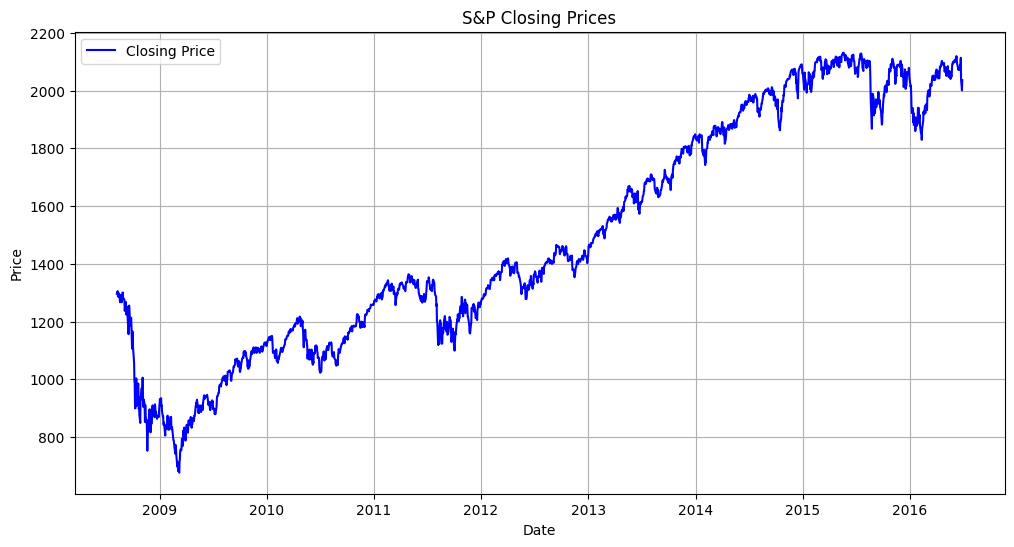

In [14]:
# Line plot of Closing Prices

plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Close'], label='Closing Price', color='b')

plt.title('S&P Closing Prices')

plt.xlabel('Date')

plt.ylabel('Price')

plt.legend()

plt.grid(True)

plt.show()

C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a745154\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


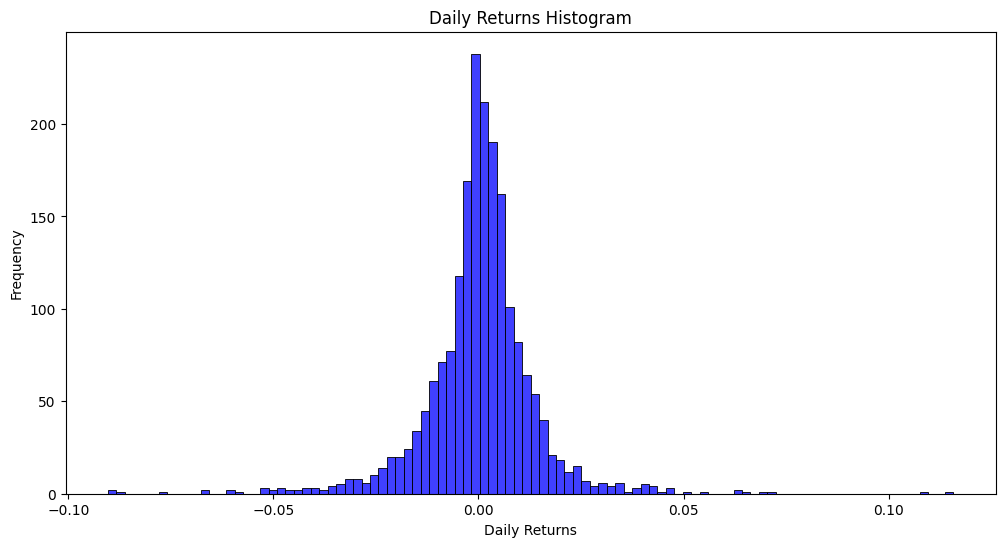

In [15]:
# Create a new DataFrame for daily returns

daily_returns = df['Close'].pct_change()



# Daily Returns Histogram

plt.figure(figsize=(12, 6))

sns.histplot(daily_returns.dropna(), bins=100, color='b')

plt.title('Daily Returns Histogram')

plt.xlabel('Daily Returns')

plt.ylabel('Frequency')

plt.show()

    

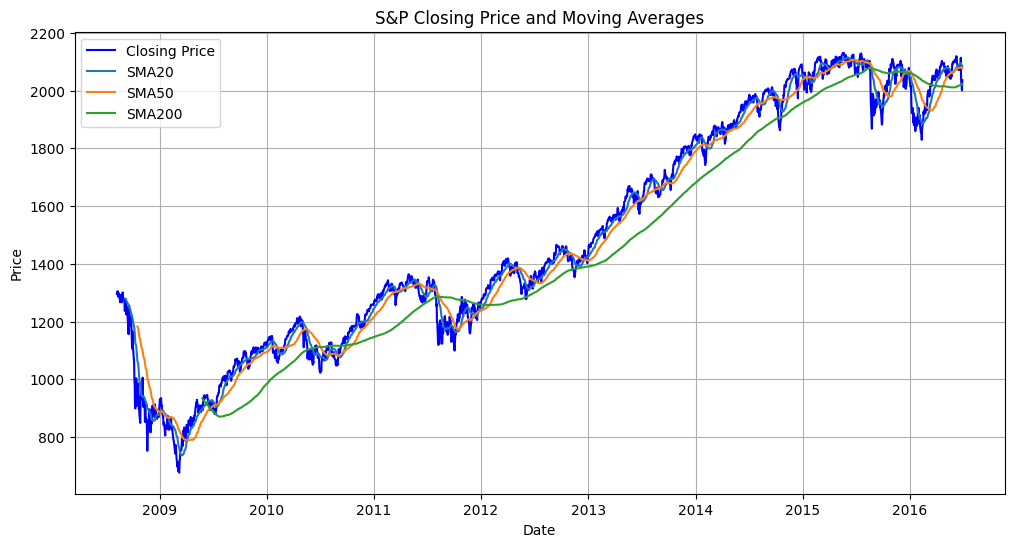

In [16]:
# Moving Averages

moving_averages = [20, 50, 200]  # Define moving average periods

plt.figure(figsize=(12, 6))

for ma in moving_averages:

    df[f'SMA{ma}'] = df['Close'].rolling(window=ma).mean()

plt.plot(df['Date'], df['Close'], label='Closing Price', color='b')

for ma in moving_averages:

    plt.plot(df['Date'], df[f'SMA{ma}'], label=f'SMA{ma}')

plt.title('S&P Closing Price and Moving Averages')

plt.xlabel('Date')

plt.ylabel('Price')

plt.legend()

plt.grid(True)

plt.show()

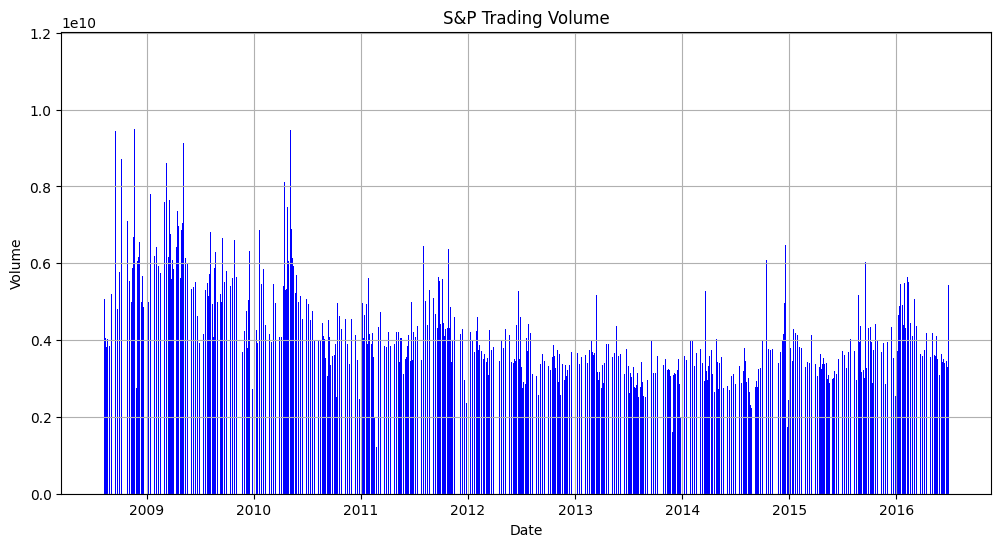

In [17]:

# Volume Analysis

plt.figure(figsize=(12, 6))

plt.bar(df['Date'], df['Volume'], color='b')

plt.title('S&P Trading Volume')

plt.xlabel('Date')

plt.ylabel('Volume')

plt.grid(True)

plt.show()


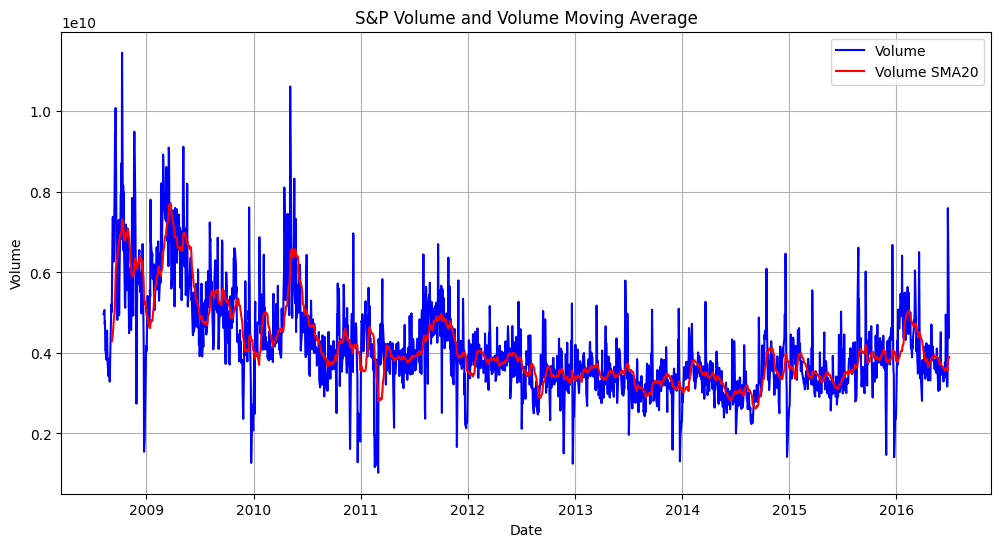

In [18]:
# Volume Moving Average

volume_ma = 20

plt.figure(figsize=(12, 6))

df['Volume_MA'] = df['Volume'].rolling(window=volume_ma).mean()

plt.plot(df['Date'], df['Volume'], label='Volume', color='b')

plt.plot(df['Date'], df['Volume_MA'], label=f'Volume SMA{volume_ma}', color='r')

plt.title('S&P Volume and Volume Moving Average')

plt.xlabel('Date')

plt.ylabel('Volume')

plt.legend()

plt.grid(True)

plt.show()

In [19]:
# News Data using API

In [20]:
# importing requests package
import requests	 

def NewsFromBBC():
	
	# BBC news api
	# following query parameters are used
	# source, sortBy and apiKey
	query_params = {
	"source": "bbc-news",
	"sortBy": "top",
	"apiKey": "eefc48c6082242858476eadd689b4051"
	}
	main_url = " https://newsapi.org/v1/articles"

	# fetching data in json format
	res = requests.get(main_url, params=query_params)
	open_bbc_page = res.json()

	# getting all articles in a string article
	article = open_bbc_page["articles"]

	# empty list which will 
	# contain all trending news
	results = []
	
	for ar in article:
		results.append(ar["title"])
		
	for i in range(len(results)):
		
		# printing all trending news
		print(i + 1, results[i])			 

# function call
NewsFromBBC() 


1 Biden interviewed by probe into handling of classified files
2 Shockwaves from Israel-Hamas war disrupt US politics
3 At least nine Americans killed in Hamas attack on Israel
4 Did Iran support plan for attack on Israel?
5 Newsom vetoes California's caste discrimination bill
6 Afghanistan earthquake: More than 1,000 dead as villagers dig for survivors
7 Afghanistan: UK special forces 'killed 9 people in their beds'
8 Coin hoard could be linked to 1692's Glencoe Massacre
9 Mbankolo landslides kill 30 in Cameroon capital Yaoundé
10 Who will actually vote for Robert F Kennedy Jr as an independent candidate?


In [67]:
#predictive analysis

In [21]:
# Import necessary libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential

from keras.layers import LSTM, Dense, Dropout

from keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

# from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV

from ta import add_all_ta_features

from ta.utils import dropna



In [23]:
data=df

Mean Squared Error: 72.63


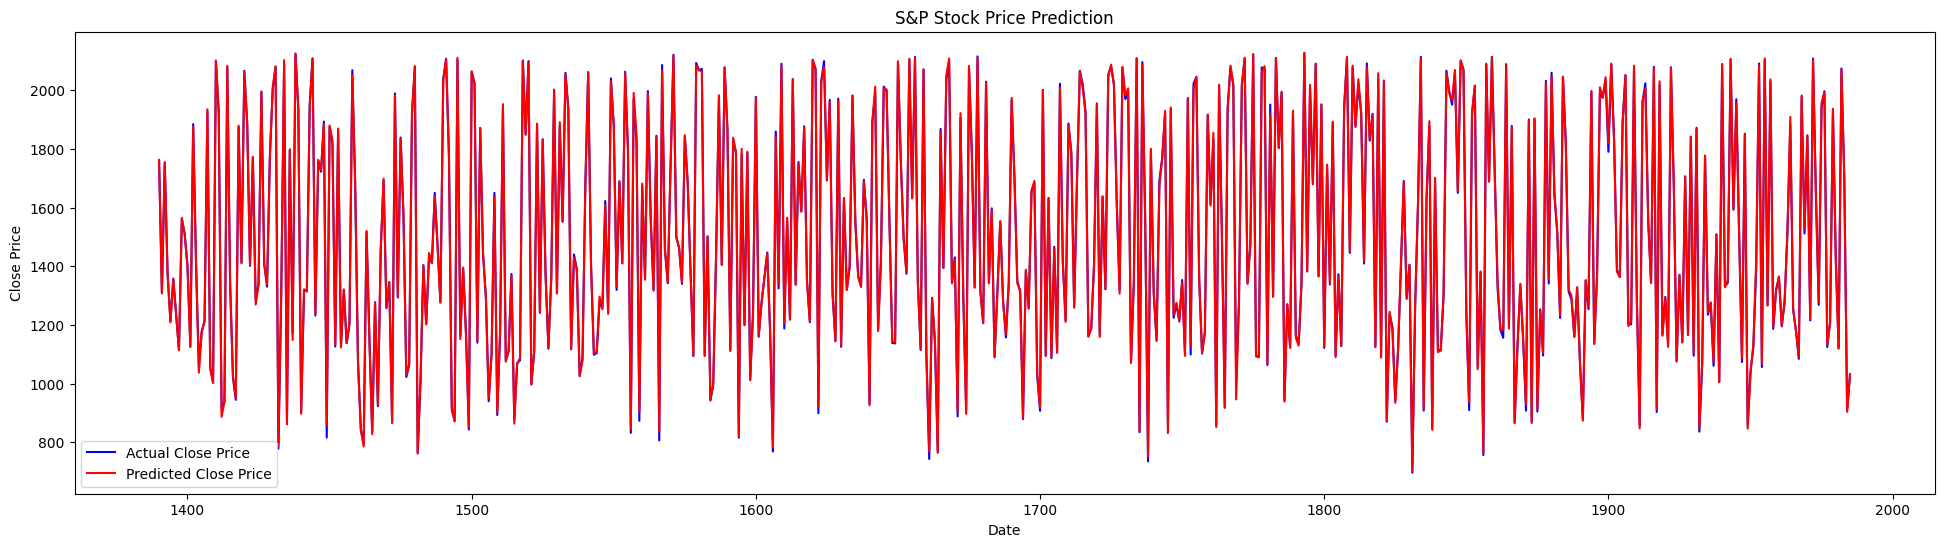

In [25]:

# Load the AAPL stock data (you can obtain this data from various sources)

 

# Data Preprocessing

# Select features (X) and target (y)

X = data[['Open', 'High', 'Low']]

y = data['Close']

 

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

 

# Train a Random Forest Regressor model

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

 

# Make predictions on the test set

y_pred = model.predict(X_test)

 

# Calculate the Mean Squared Error to evaluate the model

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

 

# Visualize the predicted vs. actual stock prices

plt.figure(figsize=(24, 6))

plt.plot(data.index[-len(y_test):], y_test, label='Actual Close Price', color='blue')

plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Close Price', color='red')

plt.xlabel('Date')

plt.ylabel('Close Price')

plt.legend()

plt.title('S&P Stock Price Prediction')

plt.show()

Epoch 1/50
22/22 [==============================] - 2s 8ms/step - loss: 0.0224
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 3/50
22/22 [==============================] - 0s 7ms/step - loss: 6.0541e-04
Epoch 4/50
22/22 [==============================] - 0s 7ms/step - loss: 4.0790e-04
Epoch 5/50
22/22 [==============================] - 0s 7ms/step - loss: 3.8790e-04
Epoch 6/50
22/22 [==============================] - 0s 7ms/step - loss: 3.8286e-04
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 3.7088e-04
Epoch 8/50
22/22 [==============================] - 0s 7ms/step - loss: 3.6238e-04
Epoch 9/50
22/22 [==============================] - 0s 7ms/step - loss: 3.5527e-04
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 3.5059e-04
Epoch 11/50
22/22 [==============================] - 0s 8ms/step - loss: 3.4590e-04
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 3.4337e-04
Epoch 13/

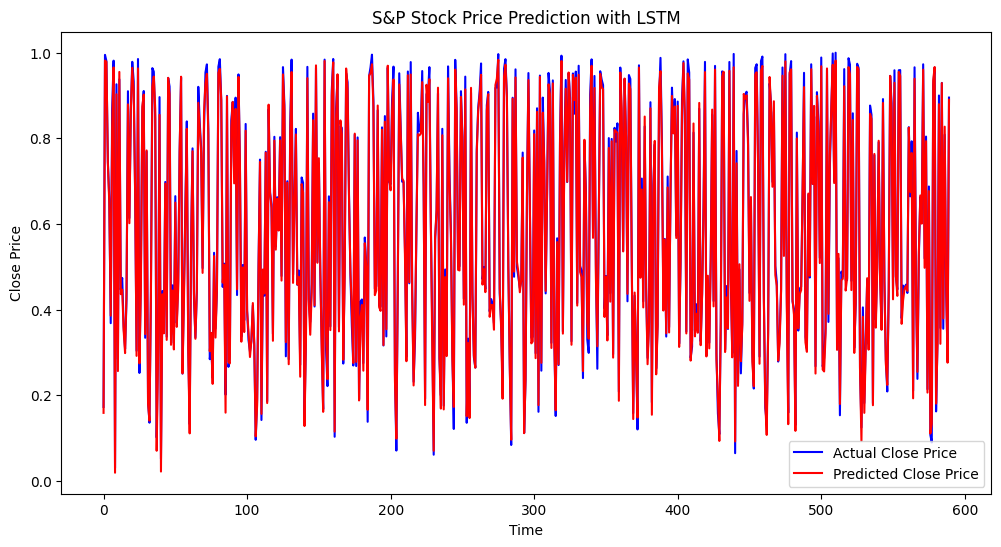

In [26]:

# Data Preprocessing

data = data[['Open', 'High', 'Low', 'Close']]

 

# Normalize the data using Min-Max scaling

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)

 

# Define a function to prepare the data for the LSTM model

def prepare_data(data, look_back=1):

    X, y = [], []

    for i in range(len(data) - look_back):

        X.append(data[i:(i+look_back)])

        y.append(data[i+look_back, 3])  # Closing price

    return np.array(X), np.array(y)

 

look_back = 20  # Adjust this to your desired sequence length

 

X, y = prepare_data(data_scaled, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

 

# Create and train the LSTM model

model = Sequential()

model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=50, batch_size=64)

 

# Make predictions on the test set

y_pred = model.predict(X_test)

 

# Inverse transform the scaled data to get real values

# y_test = scaler.inverse_transform(y_test, (1, -1)))

# y_pred = scaler.inverse_transform(y_pred)

 

# Calculate the Mean Squared Error to evaluate the model

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")

 

# Visualize the predicted vs. actual stock prices

plt.figure(figsize=(12, 6))

plt.plot(y_test, label='Actual Close Price', color='blue')

plt.plot(y_pred, label='Predicted Close Price', color='red')

plt.xlabel('Time')

plt.ylabel('Close Price')

plt.legend()

plt.title('S&P Stock Price Prediction with LSTM')

plt.show()

In [27]:
#forecasting using biLSTM

In [28]:
df1=df.reset_index()['Close']
df1

0       1296.319946
1       1305.319946
2       1289.589966
3       1285.829956
4       1292.930054
           ...     
1981    2085.449951
1982    2113.320068
1983    2037.410034
1984    2000.540039
1985    2036.089966
Name: Close, Length: 1986, dtype: float64

In [29]:
scaler=MinMaxScaler(feature_range=(0,1)) # lstm is data range sensitive

df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # so to provide the input to fit into the fit_transform

In [30]:
##splitting dataset into train and test split

 

training_size=int(len(df1)*0.70) # 65% of the total length is the training data

test_size=len(df1)-training_size # the rest is testing data

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1] #

 

In [31]:
training_size,test_size # total size is 1258

(1390, 596)

In [32]:
import numpy
def create_dataset(dataset, time_step=1): # we have this method create_dataset where

    dataX, dataY = [], []
    
    for i in range(len(dataset)-time_step-1):
    
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        
        dataX.append(a)
        
        dataY.append(dataset[i + time_step, 0])
    
    return numpy.array(dataX), numpy.array(dataY)

In [33]:
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)

X_test, ytest = create_dataset(test_data, time_step)

In [34]:
print(X_train.shape), print(y_train.shape)

(1289, 100)
(1289,)


(None, None)

In [35]:
print(X_test.shape), print(ytest.shape)

(495, 100)
(495,)


(None, None)

In [36]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # we need to re shape of x train into 3 dimension to load it into LSTM


In [37]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1) #


In [38]:
### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from keras.layers import Bidirectional

from random import random

from numpy import array

from numpy import cumsum

from keras.layers import TimeDistributed

from tensorflow.keras.callbacks import EarlyStopping

In [39]:
model = Sequential()

model.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(100,1)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
#Stacked LSTM
# model=Sequential() # we are using a sequential model

# model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # 1st layer,  inputs are x train shape which is 100 and 1

# model.add(LSTM(50,return_sequences=True)) # 2nd layer,

# model.add(LSTM(50)) # 3rd layer,

# model.add(Dense(1)) # 1 final output

# model.compile(loss='mean_squared_error',optimizer='adam') # compiling with the help of mean_sq_error and adam optimiser

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 200)               81600     
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81801 (319.54 KB)
Trainable params: 81801 (319.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30,
        verbose=1, mode='auto', restore_best_weights=True)

In [43]:
history1=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
41/41 [==============================] - 5s 76ms/step - loss: 0.0557 - val_loss: 0.0022
Epoch 2/1000
41/41 [==============================] - 3s 65ms/step - loss: 0.0022 - val_loss: 0.0092
Epoch 3/1000
41/41 [==============================] - 3s 67ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 4/1000
41/41 [==============================] - 3s 72ms/step - loss: 7.9774e-04 - val_loss: 0.0034
Epoch 5/1000
41/41 [==============================] - 3s 73ms/step - loss: 5.9426e-04 - val_loss: 0.0018
Epoch 6/1000
41/41 [==============================] - 3s 68ms/step - loss: 4.6003e-04 - val_loss: 0.0035
Epoch 7/1000
41/41 [==============================] - 3s 72ms/step - loss: 3.7714e-04 - val_loss: 0.0037
Epoch 8/1000
41/41 [==============================] - 3s 64ms/step - loss: 3.7750e-04 - val_loss: 0.0044
Epoch 9/1000
41/41 [==============================] - 3s 63ms/step - loss: 3.6775e-04 - val_loss: 0.0026
Epoch 10/1000
41/41 [==============================] - 3s 63ms/step

In [44]:
### prediction of x train data and check performance metrics

train_predict=model.predict(X_train)

test_predict=model.predict(X_test)


16/16 [==============================] - 0s 13ms/step


In [45]:
##Transformback to original form

## Since the data was scaled we need to reverse it so we can find RMS performance matrix

train_predict=scaler.inverse_transform(train_predict)

test_predict=scaler.inverse_transform(test_predict)


In [46]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

1305.7329528150285

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

2041.835708194982

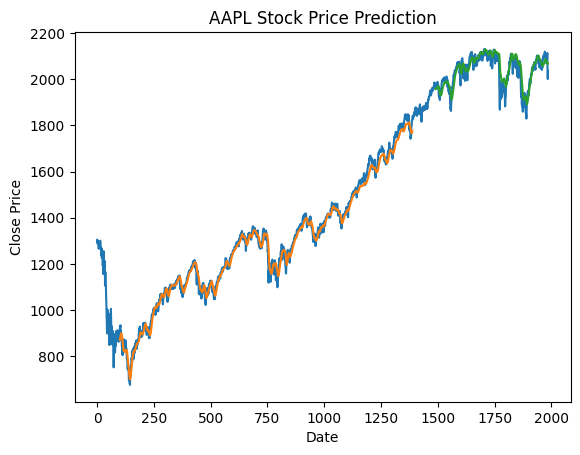

In [48]:
# shift train predictions for plotting

look_back=100 #time step

trainPredictPlot = numpy.empty_like(df1)

trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

testPredictPlot = numpy.empty_like(df1)

testPredictPlot[:, :] = numpy.nan

testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))

plt.plot(trainPredictPlot)

plt.plot(testPredictPlot)

plt.xlabel('Date')

plt.ylabel('Close Price')

plt.title('AAPL Stock Price Prediction')

plt.show()

In [49]:
#forcasting
len(test_data) # if our last date is 25th may and in order to predict 26th mays price we need 100 days data before 26th to predict it

596

In [50]:
x_input=test_data[496:].reshape(1,-1) # hence we are taking 100 datas before that (441-100=341)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input) # convert it into a list
temp_input=temp_input[0].tolist()

In [52]:
temp_input 

[0.8275653323645757,
 0.80926767047656,
 0.8084219103903925,
 0.808181259917284,
 0.7925172392027089,
 0.8170653501594487,
 0.8382440187403513,
 0.8597252840968228,
 0.8535435803149758,
 0.853509249640577,
 0.872570076544813,
 0.8559090393253257,
 0.8617744644246916,
 0.8768332915881285,
 0.8743235430196086,
 0.8634453358295398,
 0.8951584012280474,
 0.90072811247434,
 0.9055071270144299,
 0.9100385242208362,
 0.9112556263694496,
 0.8957841596085931,
 0.9026603670578628,
 0.9028734858409888,
 0.925303671182983,
 0.9235502886462665,
 0.9209992425427729,
 0.9287624236751044,
 0.9379559096772545,
 0.9441376973971807,
 0.9455267047320259,
 0.9442889538159256,
 0.9352879378294148,
 0.9347584564257285,
 0.9355217893181071,
 0.9478714310368097,
 0.9540187202061787,
 0.9511238637302215,
 0.9600904651042543,
 0.955517686424795,
 0.9411052664093906,
 0.9558821455647453,
 0.9388636160658825,
 0.9427761378142387,
 0.9389185955077681,
 0.9524853393750843,
 0.9667190552198404,
 0.9669666725535238,
 

In [53]:
from numpy import array

 

lst_output=[]

n_steps=100

i=0

while(i<30):

    

    if(len(temp_input)>100):

        #print(temp_input)

        x_input=np.array(temp_input[1:]) # one position is shifted to the right

        print("{} day input {}".format(i,x_input))

        x_input=x_input.reshape(1,-1)

        x_input = x_input.reshape((1, n_steps, 1))

        #print(x_input)

        yhat = model.predict(x_input, verbose=0)

        print("{} day output {}".format(i,yhat))

        temp_input.extend(yhat[0].tolist())

        temp_input=temp_input[1:]

        #print(temp_input)

        lst_output.extend(yhat.tolist())

        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1)) # we reshape the data before we pass it to our lstm model

        yhat = model.predict(x_input, verbose=0) #

        print(yhat[0]) # output

        temp_input.extend(yhat[0].tolist())

        print(len(temp_input))

        lst_output.extend(yhat.tolist())
        i=i+1 # the else statement is then terminated and ONLY the IF statement will be running


print(lst_output)

        

[0.94414926]
101
1 day input [0.80926767 0.80842191 0.80818126 0.79251724 0.81706535 0.83824402
 0.85972528 0.85354358 0.85350925 0.87257008 0.85590904 0.86177446
 0.87683329 0.87432354 0.86344534 0.8951584  0.90072811 0.90550713
 0.91003852 0.91125563 0.89578416 0.90266037 0.90287349 0.92530367
 0.92355029 0.92099924 0.92876242 0.93795591 0.9441377  0.9455267
 0.94428895 0.93528794 0.93475846 0.93552179 0.94787143 0.95401872
 0.95112386 0.96009047 0.95551769 0.94110527 0.95588215 0.93886362
 0.94277614 0.9389186  0.95248534 0.96671906 0.96696667 0.96555702
 0.97491561 0.97935761 0.9804577  0.97294894 0.97301777 0.97041166
 0.9731002  0.97547245 0.96217398 0.95494708 0.96603832 0.95362001
 0.94519666 0.94485956 0.94933598 0.95040183 0.96807365 0.95436941
 0.95412885 0.9420954  0.95588215 0.94250796 0.94279679 0.93757777
 0.94602177 0.94307873 0.96234588 0.97230262 0.9720001  0.97816116
 0.9767102  0.97834683 0.98242437 0.97820917 0.98527793 0.98714824
 0.99195487 0.98945184 0.97610518 

In [54]:
day_new=np.arange(1,101) # from tests data we have taken previous 100 days

In [55]:
day_pred=np.arange(101,131) # we are taking the next 30 days

In [56]:
len(df1) #1258-100=1158

1986

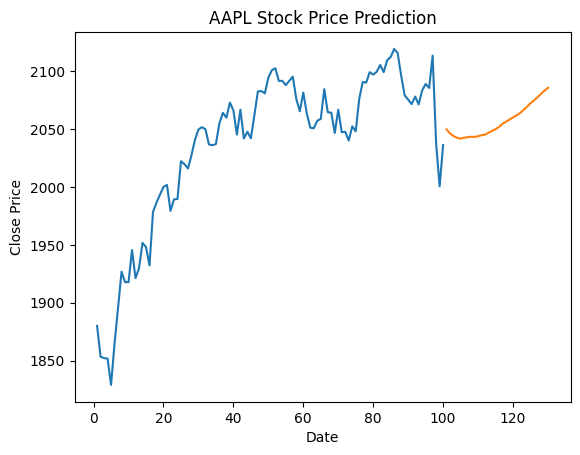

In [57]:
plt.plot(day_new,scaler.inverse_transform(df1[1886:])) # 1258-100=1258
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Date')

plt.ylabel('Close Price')
plt.title('AAPL Stock Price Prediction')

plt.show()

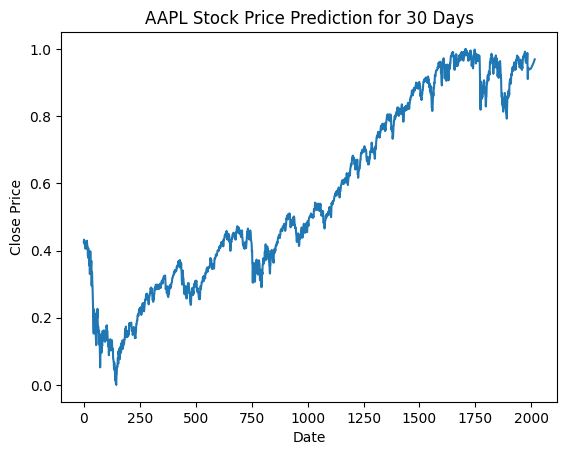

In [58]:
df3=df1.tolist()
df3.extend(lst_output)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Stock Price Prediction for 30 Days')
plt.plot(df3)

[[1296.3199462890625], [1305.3199462890625], [1289.5899658203125], [1285.8299560546875], [1292.9300537109375], [1298.199951171875], [1278.5999755859375], [1266.68994140625], [1274.5400390625], [1277.719970703125], [1292.199951171875], [1266.8399658203125], [1271.510009765625], [1281.6600341796875], [1300.6800537109375], [1282.8299560546875], [1277.5799560546875], [1274.97998046875], [1236.8299560546875], [1242.31005859375], [1267.7900390625], [1224.510009765625], [1232.0400390625], [1249.050048828125], [1251.699951171875], [1192.699951171875], [1213.5999755859375], [1156.3900146484375], [1206.510009765625], [1255.0799560546875], [1207.0899658203125], [1188.219970703125], [1185.8699951171875], [1209.1800537109375], [1213.27001953125], [1106.4200439453125], [1166.3599853515625], [1161.06005859375], [1114.280029296875], [1099.22998046875], [1056.8900146484375], [996.2299804687501], [984.9400024414064], [909.9199829101561], [899.219970703125], [1003.3499755859377], [998.0100097656251], [90

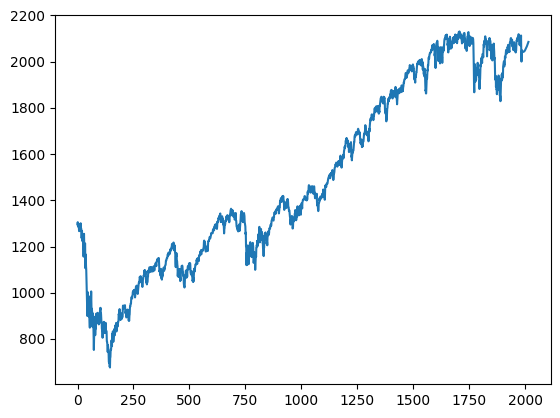

In [59]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
print(df3)

In [60]:
print(lst_output) # scaled values of predicted prices
print(scaler.inverse_transform(lst_output)) # the predicted prices for the 30 days

[[0.9441492557525635], [0.9417038559913635], [0.9401963353157043], [0.9392042756080627], [0.9387202262878418], [0.9392076730728149], [0.9395734071731567], [0.9397919178009033], [0.9397397637367249], [0.9401144981384277], [0.9407604932785034], [0.9411220550537109], [0.9421669244766235], [0.943328857421875], [0.9443271160125732], [0.9456260800361633], [0.9475001692771912], [0.9487589597702026], [0.9500216245651245], [0.9512829184532166], [0.9525294303894043], [0.9538472294807434], [0.9557405114173889], [0.957647442817688], [0.9597499370574951], [0.961401641368866], [0.9632153511047363], [0.9652284979820251], [0.9671506285667419], [0.9688995480537415]]
[[2049.59688733]
 [2046.04056681]
 [2043.84819451]
 [2042.40545196]
 [2041.70150385]
 [2042.41039286]
 [2042.94227632]
 [2043.26005415]
 [2043.18420701]
 [2043.72917952]
 [2044.66864382]
 [2045.1944595 ]
 [2046.7140027 ]
 [2048.40379021]
 [2049.85554773]
 [2051.74461817]
 [2054.47008749]
 [2056.30073396]
 [2058.1370148 ]
 [2059.97130193]
 [

In [61]:
forcasted_price=(scaler.inverse_transform(lst_output))

In [62]:
forcasted_price

array([[2049.59688733],
       [2046.04056681],
       [2043.84819451],
       [2042.40545196],
       [2041.70150385],
       [2042.41039286],
       [2042.94227632],
       [2043.26005415],
       [2043.18420701],
       [2043.72917952],
       [2044.66864382],
       [2045.1944595 ],
       [2046.7140027 ],
       [2048.40379021],
       [2049.85554773],
       [2051.74461817],
       [2054.47008749],
       [2056.30073396],
       [2058.1370148 ],
       [2059.97130193],
       [2061.78409183],
       [2063.70055392],
       [2066.45393498],
       [2069.22716632],
       [2072.28480275],
       [2074.68685988],
       [2077.32451988],
       [2080.25221933],
       [2083.04755469],
       [2085.59099088]])